# Home Credit Default Risk

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = 200
plt.style.use('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/My Drive/Credit data"

In [ ]:
#загружаем тренировочную, тестовую выборки, а также пример предсказаний
train = pd.read_csv('/content/drive/My Drive/Credit data/application_train.csv')
test = pd.read_csv('/content/drive/My Drive/Credit data/application_test.csv')
sample_submission = pd.read_csv("/content/drive/My Drive/Credit data/sample_submission.csv")

In [ ]:
train.shape

(307511, 122)

In [ ]:
#посмотрим на данные
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# Data Cleaning and Preparation

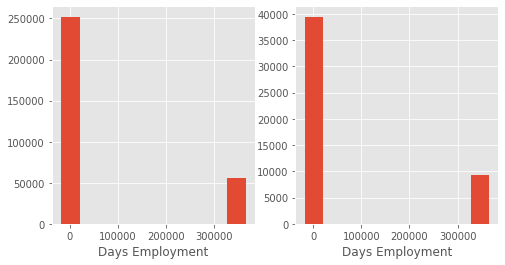

In [ ]:
#заметим выбросы:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(8, 4)
)

ax1.hist(train['DAYS_EMPLOYED']);
ax1.set_xlabel('Days Employment');

ax2.hist(test['DAYS_EMPLOYED']);
ax2.set_xlabel('Days Employment');

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


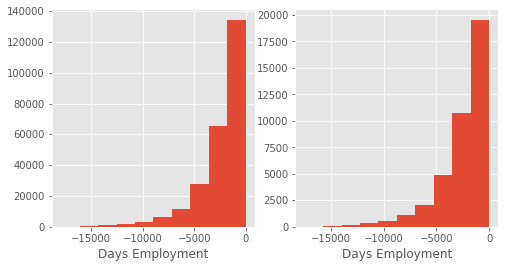

In [ ]:
# заменим их на пропуски
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(8, 4)
)

ax1.hist(train['DAYS_EMPLOYED']);
ax1.set_xlabel('Days Employment');

ax2.hist(test['DAYS_EMPLOYED']);
ax2.set_xlabel('Days Employment');

In [ ]:
#напишем функцию для проверки пропущенных значений
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values = missing_values_table(train)
missing_values.head(10)

Your selected dataframe has 122 columns.
There are 68 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MEDI,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4


In [ ]:
#удалим столбцы с пропусками более 50%
mis_val_table_ren_columns = missing_values.loc[missing_values['% of Total Values'] > 50]
train = train.drop(mis_val_table_ren_columns.index, axis=1)
train.shape

(307511, 81)

In [ ]:
#в качестве зависимой переменной берем TARGET:
y = train['TARGET']

#удаляем ID и TАRGET из тренировочной выборки:
train = train.drop(['TARGET'], axis=1)
train.shape

(307511, 80)

In [ ]:
#разделяем категориальные и числовые переменные
cat = []
num = []

for i in train.columns:
    if train[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

print("Categorical: " + str(len(cat)))
print("Numerical: " + str(len(num)))

Categorical: 13
Numerical: 67


In [ ]:
#создаем список самых частых значений для категориальных переменных
most_freq_cat_nans = []
for i in cat:
    most_freq_cat_nans.append(train[i].value_counts().idxmax())

In [ ]:
#заменяем пропуски самыми частыми значениями в категориальных переменных и медианой в числовых
for i in range(len(cat)):
    train[cat[i]].fillna(most_freq_cat_nans[i], inplace=True)
    
for i in num:
    train[i].fillna(train[i].median(), inplace=True)

print(train.isna().sum().max())

0


In [ ]:
#те же действия для тестовой выборки:
test = test.drop(mis_val_table_ren_columns.index, axis=1)
#test = test.drop(['SK_ID_CURR'], axis=1)

cat = []
num = []

for i in test.columns:
    if test[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

print(len(cat), len(num))

most_freq_cat_nans = [] 
for i in cat:
    most_freq_cat_nans.append(test[i].value_counts().idxmax())
    
for i in range(len(cat)):
    test[cat[i]].fillna(most_freq_cat_nans[i], inplace=True)
    
for i in num:
    test[i].fillna(test[i].median(), inplace=True)

print(test.isna().sum().max()) 

13 67
0


In [ ]:
#объединим тестовую и тренировочную выборки
df = train.append(test)
df.drop(['SK_ID_CURR'], axis = 1, inplace = True)
df.tail()

Закодируем все категориальные переменные с помощью One Hot Encoding 

In [ ]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
df = pd.get_dummies(df, columns= categorical_columns, dummy_na= True)
df.tail()

In [ ]:
x_train = df[:307511]
x_test = df[307511:]

# Decision Tree

## max_depth

Зависимость метрики от глубины дерева:

In [ ]:
#функция для оценки ошибки модели(DecisionTreeClassifier) с помощью кроссвалидации данных(k-fold):
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc

depths = [2, 3, 5, 7, 10, 15, 20]

def kfold1(X, y):
    
    result = []
    for depth in depths:
        # Инициализируем модель
        model = DecisionTreeClassifier(random_state=42,
                                   # функция для impurity ('gini' или 'entropy')
                                   criterion='gini',
                                   # максимальная глубина дерева
                                   max_depth=depth,
                                   # минимальное число элементов в узле для разбиения (может быть долей)
                                   min_samples_split=2,
                                   # минимальное число элементов в листе (может быть долей)
                                   min_samples_leaf=1
                                  )
        
        kf = KFold(n_splits = 3, random_state = 42, shuffle = True)
        roc_auc_list = []
        
        for i, (train_index, test_index) in enumerate(kf.split(X)):
            
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]
        
            model.fit(X_train, y_train)
            pred_prob = model.predict_proba(X_test)
            predict = pred_prob[:,1]
            roc_auc = roc_auc_score(y_test, predict)
            print(i, roc_auc)
            roc_auc_list.append(roc_auc)
            
        result.append(np.mean(roc_auc_list))
        
    return result

In [ ]:
cross_val_1 = kfold1(x_train, y)

0 0.6498316130024933
1 0.6501047474155235
2 0.6516388620537137
0 0.6832643171658872
1 0.6817836782068539
2 0.6848589225641716
0 0.708382449624464
1 0.7059227779570731
2 0.7061530868340526
0 0.7140221463354974
1 0.7102827343718726
2 0.7101841340262687
0 0.7013870171322645
1 0.7008336134095461
2 0.7017705331155769
0 0.6373506789551795
1 0.6413591789183251
2 0.6398409809768586
0 0.5590742886497411
1 0.562774270435491
2 0.5697144009119186


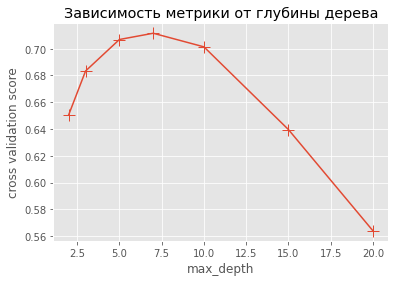

In [ ]:
plt.plot(depths, cross_val_1, '-+', markersize=12)
plt.title("Зависимость метрики от глубины дерева")
plt.xlabel("max_depth")   
plt.ylabel("cross validation score")
plt.show()

Зависимость метрики от минимального числа элементов в узле для разбиения:

## min_samples_split

In [ ]:
splits = [2, 5, 10, 50, 100, 200, 500]

def kfold2(X, y):
    
    result = []
    for split in splits:
        # Инициализируем модель
        model = DecisionTreeClassifier(random_state=42,
                                   # функция для impurity ('gini' или 'entropy')
                                   criterion='gini',
                                   # максимальная глубина дерева
                                   max_depth=7,
                                   # минимальное число элементов в узле для разбиения (может быть долей)
                                   min_samples_split=split,
                                   # минимальное число элементов в листе (может быть долей)
                                   min_samples_leaf=1
                                  )
        
        kf = KFold(n_splits = 3, random_state = 42, shuffle = True)
        roc_auc_list = []
        
        for i, (train_index, test_index) in enumerate(kf.split(X)):
            
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]
        
            model.fit(X_train, y_train)
            pred_prob = model.predict_proba(X_test)
            predict = pred_prob[:,1]
            roc_auc = roc_auc_score(y_test, predict)
            print(i, roc_auc)
            roc_auc_list.append(roc_auc)
            
        result.append(np.mean(roc_auc_list))
        
    return result

In [ ]:
cross_val_2 = kfold2(x_train, y)

0 0.7140221463354974
1 0.7102827343718726
2 0.7101841340262687
0 0.7140115750578133
1 0.7102827343718726
2 0.710116426209273
0 0.7139898719975486
1 0.7103968359568178
2 0.7101917416606587
0 0.7141333547787081
1 0.7104082403698571
2 0.7103264957892854
0 0.7142076566281452
1 0.7104082403698571
2 0.7103339046493802
0 0.7142146215163568
1 0.7112739567317388
2 0.7103098297262989
0 0.7145044051367813
1 0.71142938834392
2 0.7109222371956059


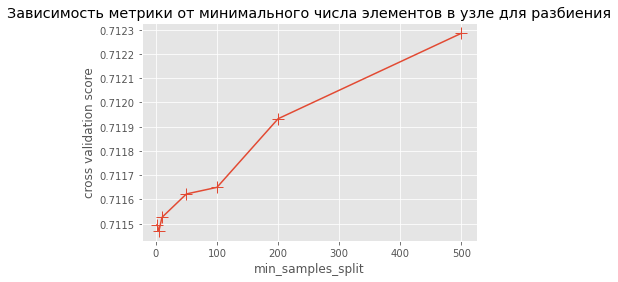

In [ ]:
plt.plot(splits, cross_val_2, '-+', markersize=12)
plt.title("Зависимость метрики от минимального числа элементов в узле для разбиения")
plt.xlabel("min_samples_split")   
plt.ylabel("cross validation score")
plt.show()

## min_samples_leaf

Зависимость метрики от минимального числа элементов в листе:

In [ ]:
leafs = [1, 2, 5, 10, 50, 100]

def kfold3(X, y):
    
    result = []
    for leaf in leafs:
        # Инициализируем модель
        model = DecisionTreeClassifier(random_state=42,
                                   # функция для impurity ('gini' или 'entropy')
                                   criterion='gini',
                                   # максимальная глубина дерева
                                   max_depth=7,
                                   # минимальное число элементов в узле для разбиения (может быть долей)
                                   min_samples_split=10,
                                   # минимальное число элементов в листе (может быть долей)
                                   min_samples_leaf=leaf
                                  )
        
        kf = KFold(n_splits = 3, random_state = 42, shuffle = True)
        roc_auc_list = []
        
        for i, (train_index, test_index) in enumerate(kf.split(X)):
            
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]
        
            model.fit(X_train, y_train)
            pred_prob = model.predict_proba(X_test)
            predict = pred_prob[:,1]
            roc_auc = roc_auc_score(y_test, predict)
            print(i, roc_auc)
            roc_auc_list.append(roc_auc)
            
        result.append(np.mean(roc_auc_list))
        
    return result

In [ ]:
cross_val_3 = kfold3(x_train, y)

0 0.7139898719975486
1 0.7103968359568178
2 0.7101917416606587
0 0.7143676497088483
1 0.7100517064583661
2 0.7103491270172417
0 0.7141479991017889
1 0.7102481082176174
2 0.709752879639988
0 0.7133981056847722
1 0.7101865939640377
2 0.7099213950663616
0 0.7134822306090526
1 0.7091959215263192
2 0.7096357344615081
0 0.7133716991729108
1 0.7105882461150346
2 0.7102085251811832


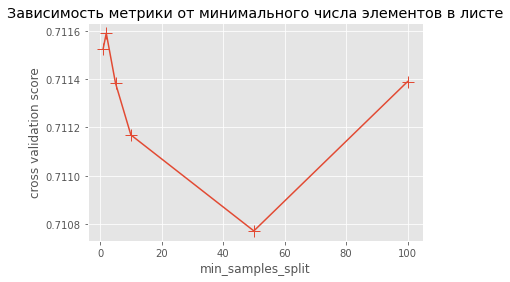

In [ ]:
plt.plot(leafs, cross_val_3, '+-', markersize=12)
plt.title("Зависимость метрики от минимального числа элементов в листе")
plt.xlabel("min_samples_split")   
plt.ylabel("cross validation score")
plt.show()

Подберем "лучшие" гиперпараметры для дерева решений:

## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'),
              'max_depth':[5, 7, 10], 
              'min_samples_split':[2, 10, 100],
              'min_samples_leaf' :[1, 2, 5]
              }

model = DecisionTreeClassifier(random_state = 42)

clf = GridSearchCV(model, parameters, cv = 3, scoring = 'roc_auc')

clf.fit(x_train, y)

In [ ]:
print(clf.best_score_)
print(clf.best_params_) 

0.7130550610015264
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 100}


Включая "лучшие" гиперпараметры из GridSearchCV и запустим новый поиск RandomizedSearchCV:

## RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'max_depth':[5, 7, 10], 
              'min_samples_split':[100, 200, 500],
              'min_samples_leaf' :[1, 2]
              }

model = DecisionTreeClassifier(random_state = 42,
                               criterion = 'gini')

rnd_search = RandomizedSearchCV(model, parameters, cv = 3, scoring = 'roc_auc')

rnd_search.fit(x_train, y)

In [ ]:
print(rnd_search.best_score_)
print(rnd_search.best_params_) 

0.7133324018868655
{'min_samples_split': 500, 'min_samples_leaf': 1, 'max_depth': 7}


In [ ]:
#записываем прогноз
pred_prob = rnd_search.predict_proba(x_test)
prediction = pred_prob[:,1]

sample_submission['TARGET'] = prediction
sample_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.105695
1,100005,0.117175
2,100013,0.021252
3,100028,0.038785
4,100038,0.070405


In [ ]:
#кладем результат в файл:
sample_submission.to_csv('sub2.csv', index = None)

## Public Score: 0.70300
## Private Score: 0.69187

# Random Forest

## n_estimators

In [ ]:
#функция для оценки ошибки модели(RandomForestClassifier) с помощью кроссвалидации данных(k-fold):
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc

n_estimators = [10, 30, 50, 100, 500]

def kfold4(X, y):
    
    result = []
    for estimators in n_estimators:
        # Инициализируем модель

        model = RandomForestClassifier(random_state=42,
                               # опции, относящиеся к отдельным деревьям такаие же, как в tree.DecisionTreeClassifier
                               # число деревьев в лесу
                               n_estimators=estimators,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               max_depth=5,
                               min_samples_split = 10,
                               min_samples_leaf =5  )
        
        kf = KFold(n_splits = 3, random_state = 42, shuffle = True)
        roc_auc_list = []
        
        for i, (train_index, test_index) in enumerate(kf.split(X)):
            
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]
        
            model.fit(X_train, y_train)
            pred_prob = model.predict_proba(X_test)
            predict = pred_prob[:,1]
            roc_auc = roc_auc_score(y_test, predict)
            print(i, roc_auc)
            roc_auc_list.append(roc_auc)
            
        result.append(np.mean(roc_auc_list))
        
    return result

In [ ]:
cross_val_4 = kfold4(x_train, y)

0 0.7035452891315513
1 0.6962079265313708
2 0.6989434818360346
0 0.715581491021806
1 0.7112579256487805
2 0.7148266251487572
0 0.7191065555056614
1 0.7142751192873634
2 0.7188535903688391
0 0.7210089913231162
1 0.7172142220868412
2 0.7214083511963661
0 0.7231622278396146
1 0.7187649103640348
2 0.7226392119713363


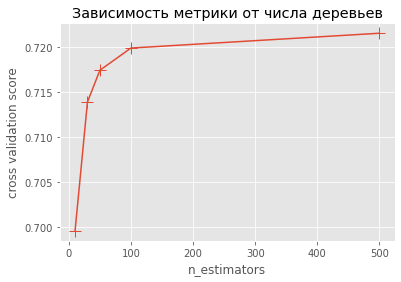

In [ ]:
plt.plot(n_estimators, cross_val_4, '-+', markersize=12)
plt.title("Зависимость метрики от числа деревьев")
plt.xlabel("n_estimators")   
plt.ylabel("cross validation score")
plt.show()

## criterion

In [ ]:
criterions = ['gini', 'entropy']

def kfold5(X, y):
    
    result = []
    for criterion in criterions:
        # Инициализируем модель

        model = RandomForestClassifier(random_state=42,
                               # опции, относящиеся к отдельным деревьям такаие же, как в tree.DecisionTreeClassifier
                               # число деревьев в лесу
                               n_estimators=100,
                               # функция для impurity ('gini' или 'entropy')
                               criterion=criterion,
                               max_depth=5)
        
        kf = KFold(n_splits = 3, random_state = 42, shuffle = True)
        roc_auc_list = []
        
        for i, (train_index, test_index) in enumerate(kf.split(X)):
            
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]
        
            model.fit(X_train, y_train)
            pred_prob = model.predict_proba(X_test)
            predict = pred_prob[:,1]
            roc_auc = roc_auc_score(y_test, predict)
            print(i, roc_auc)
            roc_auc_list.append(roc_auc)
            
        result.append(np.mean(roc_auc_list))
        
    return result

In [ ]:
cross_val_5 = kfold5(x_train, y)

0 0.7210089913231162
1 0.7172142220868412
2 0.7214083511963661
0 0.7256576021111478
1 0.7169342466825921
2 0.7224481892282552


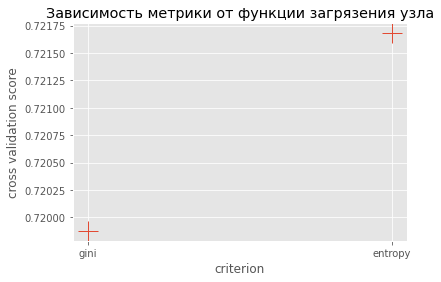

In [ ]:
plt.plot(criterions, cross_val_5, '+', markersize=20)
plt.title("Зависимость метрики от функции загрязения узла")
plt.xlabel("criterion")   
plt.ylabel("cross validation score")
plt.show()

## max_depths

In [ ]:
max_depths = [3, 5, 7, 10, 15]

def kfold6(X, y):
    
    result = []
    for max_depth in max_depths:
        # Инициализируем модель

        model = RandomForestClassifier(random_state=42,
                               # опции, относящиеся к отдельным деревьям такаие же, как в tree.DecisionTreeClassifier
                               # число деревьев в лесу
                               n_estimators=100,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='entropy',
                               max_depth=max_depth)
        
        kf = KFold(n_splits = 3, random_state = 42, shuffle = True)
        roc_auc_list = []
        
        for i, (train_index, test_index) in enumerate(kf.split(X)):
            
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]
        
            model.fit(X_train, y_train)
            pred_prob = model.predict_proba(X_test)
            predict = pred_prob[:,1]
            roc_auc = roc_auc_score(y_test, predict)
            print(i, roc_auc)
            roc_auc_list.append(roc_auc)
            
        result.append(np.mean(roc_auc_list))
        
    return result

In [ ]:
cross_val_6 = kfold6(x_train, y)

0 0.7160318741814646
1 0.7105838940905049
2 0.7162972625803096
0 0.7256576021111478
1 0.7169342466825921
2 0.7224481892282552
0 0.7286800464501411
1 0.7245746048813471
2 0.7277295932106507
0 0.7346512656265934
1 0.7311120806380987
2 0.7331807898088036
0 0.7370935407968466
1 0.7330991835961862
2 0.7360123386794609


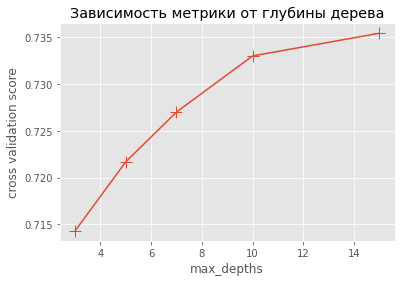

In [ ]:
plt.plot(max_depths, cross_val_6, '-+', markersize=12)
plt.title("Зависимость метрики от глубины дерева")
plt.xlabel("max_depths")   
plt.ylabel("cross validation score")
plt.show()

## RandomizedSearchCV

Посмотрим на перебор гиперпараметров с помощью RandomizedSearchCV:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'criterion':('gini', 'entropy'),
              'max_depth':[3, 5], 
              'n_estimators':[10, 100],
              }

model = RandomForestClassifier(random_state = 42,
                               criterion = 'entropy')

rnd_search = RandomizedSearchCV(model, parameters, cv = 3, scoring = 'roc_auc')

rnd_search.fit(x_train, y)

In [ ]:
print(rnd_search.best_score_)
print(rnd_search.best_params_) 

0.7201560667093467
{'n_estimators': 100, 'max_depth': 5, 'criterion': 'entropy'}


Учитывая результаты запустим более строгий GridSearchCV:

## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc

parameters = {'criterion':('gini', 'entropy'),
              'max_depth':[15, 20], 
              'n_estimators':[300, 500],
              }

model = RandomForestClassifier(random_state = 42,
                               n_jobs = -1)

clf = GridSearchCV(model, parameters, cv = 3, scoring = 'roc_auc')

clf.fit(x_train, y)

(считалось более часа)

In [ ]:
#выведем лучшую среднюю метрику на кросс-валидации и лучшие параметры
print(clf.best_score_)
print(clf.best_params_) 

0.7400145928173124
{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 500}


In [ ]:
def kfold7(X, y):
    
    model = RandomForestClassifier(random_state=42,
                               # опции, относящиеся к отдельным деревьям такаие же, как в tree.DecisionTreeClassifier
                               # число деревьев в лесу
                               n_estimators=500,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='entropy',
                               max_depth=20)
        
    kf = KFold(n_splits = 3, random_state = 42, shuffle = True)
    roc_auc_list = []
        
    for i, (train_index, test_index) in enumerate(kf.split(X)):
            
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        pred_prob = model.predict_proba(X_test)
        predict = pred_prob[:,1]
        roc_auc = roc_auc_score(y_test, predict)
        print(i, roc_auc)
        roc_auc_list.append(roc_auc)
            
        
    return np.mean(roc_auc_list)

In [ ]:
kfold7(x_train, y)

0 0.7421337147393537
1 0.7382916091278787
2 0.741111903549363


0.7405124091388652

Построим случайный лес на "наилучших" гиперпараметрах, найденных с помощью GridSearchCV: 

criterion - entropy,
max_depth = 20,
n_estimators = 500

---



In [ ]:
model = RandomForestClassifier(random_state=42,
                               # опции, относящиеся к отдельным деревьям такаие же, как в tree.DecisionTreeClassifier
                               # число деревьев в лесу
                               n_estimators=500,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='entropy',
                               max_depth=20)

model.fit(x_train, y)

In [ ]:
#записываем прогноз
pred_prob = model.predict_proba(x_test)
prediction = pred_prob[:,1]

sample_submission['TARGET'] = prediction
sample_submission.head()

#кладем результат в файл:
sample_submission.to_csv('/content/drive/My Drive/Credit data/sub3.csv', index = None)

## Public Score: 0.72641
## Private Score: 0.72614

## Feature importances

Оценим значимость переменных для построения леса:

In [ ]:
imp = pd.DataFrame({'feature': df.columns,
                    'importance': model.feature_importances_}).sort_values('importance', ascending=False)
imp.head(7)

,feature,importance
26,EXT_SOURCE_2,0.086810
27,EXT_SOURCE_3,0.085160
6,DAYS_BIRTH,0.041699
7,DAYS_EMPLOYED,0.039995
9,DAYS_ID_PUBLISH,0.037842
39,DAYS_LAST_PHONE_CHANGE,0.035903
8,DAYS_REGISTRATION,0.035894


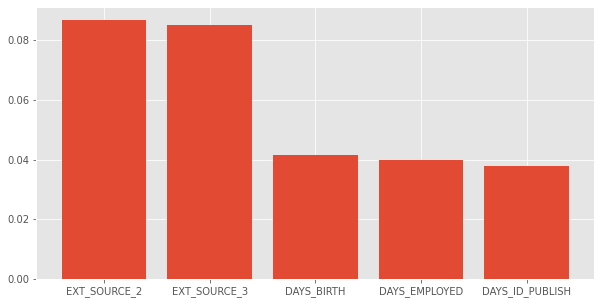

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(imp['feature'][:5], imp['importance'][:5]);

Таким образом топ-5 переменных, которые внесли наибольший вклад в построение модели: 

EXT_SOURCE_2,
EXT_SOURCE_3,
DAYS_BIRTH,
DAYS_EMPLOYED,
DAYS_ID_PUBLISH	

1. Построим модель только на этих признаках:

In [ ]:
x_new = x_train[['EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH'	]].copy()
x_new.tail()

In [ ]:
kfold7(x_new, y)

0 0.7037271749121664
1 0.7054851895617442
2 0.7018855350166724


0.7036992998301944

Таким образом, среднее значение метрики на кросс-валидации упало примерно на 0.04, но в целом можно сказать, что мы получили адекватную модель, а также более интерпретируемую.

2. Построим модель на всех признаках, исключая самый важный:

In [ ]:
x_new_2 = x_train.drop(['EXT_SOURCE_2'], axis=1)
#x_new_2.tail()

In [ ]:
kfold7(x_new_2, y)

0 0.7213221407487004
1 0.7203273559893775
2 0.7221465898936317


0.7212653622105698

Убрав самый значимый признак для построения модели, мы потеряли около 0.02 сотых качества. Модель также адекватно прогнозирует, 
но отмечаем, что переменная EXT_SOURCE_2 вносит наибольший вклад в качество предсказания.

# Best Decision with random forest

Попробуем добиться наилучшего скора с помощью случайного леса. Будем использовать LabelEncoder, чтобы избежать слишком большого числа переменных и уменьшить время работы алгоритма.

In [ ]:
from sklearn import preprocessing

df = train.append(test)

le = preprocessing.LabelEncoder()
le_count = 0

for col in df:
    if df[col].dtype == 'object':
        le.fit(df[col])
        df[col] = le.transform(df[col])
        le_count += 1
print ('{} variable are label encoded'.format(le_count))
df.shape

13 variable are label encoded


(356255, 80)

Увеличим количество переменных, добавив новые таблицы.

### Bureau

In [ ]:
bureau = pd.read_csv('/content/drive/My Drive/Credit data/bureau.csv', nrows = None)

In [ ]:
#смотрим на пропуски
missing_values = missing_values_table(bureau)

#удалим столбцы с пропусками более 50%
mis_val_table_ren_columns = missing_values.loc[missing_values['% of Total Values'] > 50]
bureau = bureau.drop(mis_val_table_ren_columns.index, axis=1)

#разбиваем переменные на 2 типа
cat = []
num = []

for i in bureau.columns:
    if bureau[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

print("Categorical: " + str(len(cat)))
print("Numerical: " + str(len(num)))

#заполняем пропуски
most_freq_cat_nans = [] 
for i in cat:
    most_freq_cat_nans.append(bureau[i].value_counts().idxmax())
    
for i in range(len(cat)):
    bureau[cat[i]].fillna(most_freq_cat_nans[i], inplace=True)
    
for i in num:
    bureau[i].fillna(bureau[i].median(), inplace=True)

print(bureau.isna().sum().max()) 

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.
Categorical: 3
Numerical: 12
0


In [ ]:
le_count = 0

for col in bureau:
    if bureau[col].dtype == 'object':
        le.fit(bureau[col])
        bureau[col] = le.transform(bureau[col])
        le_count += 1
print ('{} variable are label encoded'.format(le_count))

bureau = bureau.groupby('SK_ID_CURR', as_index = False).mean()
bureau.tail()

In [ ]:
df = df.merge(bureau, how='left', on='SK_ID_CURR')
del bureau
print(df.shape)

(356255, 94)


### POS_CASH_balance

In [ ]:
pos = pd.read_csv('/content/drive/My Drive/Credit data/POS_CASH_balance.csv', nrows = None)

In [ ]:
#смотрим на пропуски
missing_values = missing_values_table(pos)

#удалим столбцы с пропусками более 50%
mis_val_table_ren_columns = missing_values.loc[missing_values['% of Total Values'] > 50]
pos = pos.drop(mis_val_table_ren_columns.index, axis=1)

#разбиваем переменные на 2 типа
cat = []
num = []

for i in pos.columns:
    if pos[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

print("Categorical: " + str(len(cat)))
print("Numerical: " + str(len(num)))

#заполняем пропуски
most_freq_cat_nans = [] 
for i in cat:
    most_freq_cat_nans.append(pos[i].value_counts().idxmax())
    
for i in range(len(cat)):
    pos[cat[i]].fillna(most_freq_cat_nans[i], inplace=True)
    
for i in num:
    pos[i].fillna(pos[i].median(), inplace=True)

print(pos.isna().sum().max()) 

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.
Categorical: 1
Numerical: 7
0


In [ ]:
le_count = 0

for col in pos:
    if pos[col].dtype == 'object':
        le.fit(pos[col])
        pos[col] = le.transform(pos[col])
        le_count += 1
print ('{} variable are label encoded'.format(le_count))

pos = pos.groupby('SK_ID_CURR', as_index = False).mean()

1 variable are label encoded


In [ ]:
df = df.merge(pos, how='left', on='SK_ID_CURR')
del pos
print(df.shape)

(356255, 101)


### Credit_card_balance

In [ ]:
cc = pd.read_csv('/content/drive/My Drive/Credit data/credit_card_balance.csv', nrows = None)

In [ ]:
#смотрим на пропуски
missing_values = missing_values_table(cc)

#удалим столбцы с пропусками более 50%
mis_val_table_ren_columns = missing_values.loc[missing_values['% of Total Values'] > 50]
cc = cc.drop(mis_val_table_ren_columns.index, axis=1)

#разбиваем переменные на 2 типа
cat = []
num = []

for i in cc.columns:
    if cc[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

print("Categorical: " + str(len(cat)))
print("Numerical: " + str(len(num)))

#заполняем пропуски
most_freq_cat_nans = [] 
for i in cat:
    most_freq_cat_nans.append(cc[i].value_counts().idxmax())
    
for i in range(len(cat)):
    cc[cat[i]].fillna(most_freq_cat_nans[i], inplace=True)
    
for i in num:
    cc[i].fillna(cc[i].median(), inplace=True)

print(cc.isna().sum().max()) 

Your selected dataframe has 23 columns.
There are 9 columns that have missing values.
Categorical: 1
Numerical: 22
0


In [ ]:
le_count = 0

for col in cc:
    if cc[col].dtype == 'object':
        le.fit(cc[col])
        cc[col] = le.transform(cc[col])
        le_count += 1
print ('{} variable are label encoded'.format(le_count))

cc = cc.groupby('SK_ID_CURR', as_index = False).mean()

1 variable are label encoded


In [ ]:
df = df.merge(cc, how='left', on='SK_ID_CURR')
del cc
print(df.shape)

(356255, 123)


## Installments_payments

In [ ]:
ip = pd.read_csv('/content/drive/My Drive/Credit data/installments_payments.csv', nrows = None)

In [ ]:
#смотрим на пропуски
missing_values = missing_values_table(ip)

#удалим столбцы с пропусками более 50%
mis_val_table_ren_columns = missing_values.loc[missing_values['% of Total Values'] > 50]
ip = ip.drop(mis_val_table_ren_columns.index, axis=1)

#разбиваем переменные на 2 типа
cat = []
num = []

for i in ip.columns:
    if ip[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

print("Categorical: " + str(len(cat)))
print("Numerical: " + str(len(num)))

#заполняем пропуски
most_freq_cat_nans = [] 
for i in cat:
    most_freq_cat_nans.append(ip[i].value_counts().idxmax())
    
for i in range(len(cat)):
    ip[cat[i]].fillna(most_freq_cat_nans[i], inplace=True)
    
for i in num:
    ip[i].fillna(ip[i].median(), inplace=True)

print(ip.isna().sum().max()) 

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.
Categorical: 0
Numerical: 8
0


In [ ]:
le_count = 0

for col in ip:
    if ip[col].dtype == 'object':
        le.fit(ip[col])
        ip[col] = le.transform(ip[col])
        le_count += 1
print ('{} variable are label encoded'.format(le_count))

ip = ip.groupby('SK_ID_CURR', as_index = False).mean()

0 variable are label encoded


In [ ]:
df = df.merge(ip, how='left', on='SK_ID_CURR')
del ip
print(df.shape)

(356255, 130)


Удалим пропуски в общей таблице и столбец SK_ID_CURR:

In [ ]:
for i in df.columns:
    df[i] = df[i].fillna(df[i].mean())

print(df.isna().sum().max()) 
df = df.drop(['SK_ID_CURR'], axis=1)
df.head()

In [ ]:
x_train = df[:307511]
x_test = df[307511:]

In [ ]:
#тестируем модель
kfold7(x_train, y)

0 0.7508197076674932
1 0.7513449791960789
2 0.7521830290167282


0.7514492386267667

In [ ]:
#обучаем окончательную модель
model = RandomForestClassifier(random_state=42,
                               # опции, относящиеся к отдельным деревьям такаие же, как в tree.DecisionTreeClassifier
                               # число деревьев в лесу
                               n_estimators=500,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='entropy',
                               max_depth=20)

model.fit(x_train, y)

In [ ]:
#записываем прогноз
pred_prob = model.predict_proba(x_test)
prediction = pred_prob[:,1]

sample_submission['TARGET'] = prediction
sample_submission.head()

#кладем результат в файл:
sample_submission.to_csv('/content/drive/My Drive/Credit data/sub4.csv', index = None)

## Public score: 0.73194
## Private score: 0.74019



Попробуем применить алгоритмы бустинга:

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

def kfold8(X, y):
    
    model = GradientBoostingClassifier(random_state=42,
                                learning_rate = 0.05,
                                loss = 'deviance',
                                n_estimators = 200,
                                max_depth = 3
                                 )
        
    kf = KFold(n_splits = 3, random_state = 42, shuffle = True)
    roc_auc_list = []
        
    for i, (train_index, test_index) in enumerate(kf.split(X)):
            
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        pred_prob = model.predict_proba(X_test)
        predict = pred_prob[:,1]
        roc_auc = roc_auc_score(y_test, predict)
        print(i, roc_auc)
        roc_auc_list.append(roc_auc)
            
        
    return np.mean(roc_auc_list)

In [ ]:
kfold8(x_train, y)

0 0.7580814544174705
1 0.757964863722555
2 0.758370413322828


0.7581389104876178

# XGBoost

In [ ]:
from xgboost import XGBClassifier

def kfold9(X, y):
    
    model = XGBClassifier(seed=42,
                      n_estimators=1000,
                      max_depth=3,
                      learning_rate=0.08)
        
    kf = KFold(n_splits = 3, random_state = 42, shuffle = True)
    roc_auc_list = []
        
    for i, (train_index, test_index) in enumerate(kf.split(X)):
            
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        pred_prob = model.predict_proba(X_test)
        predict = pred_prob[:,1]
        roc_auc = roc_auc_score(y_test, predict)
        print(i, roc_auc)
        roc_auc_list.append(roc_auc)
            
        
    return np.mean(roc_auc_list)

In [ ]:
kfold9(x_train, y)

0 0.7702775186471015
1 0.7687823336781393
2 0.7691138877608447


0.7693912466953617

In [ ]:
xb = XGBClassifier(seed=42,
                      n_estimators=1000,
                      max_depth=3,
                      learning_rate=0.1)

xb.fit(x_train, y)

In [ ]:
#записываем прогноз
pred_prob = xb.predict_proba(x_test)
prediction = pred_prob[:,1]

sample_submission['TARGET'] = prediction
sample_submission.head()

#кладем результат в файл:
sample_submission.to_csv('/content/drive/My Drive/Credit data/sub5.csv', index = None)

Отмечаем заметный рост метрик:

## Public score: 0.76506
## Private score: 0.76257